# Problems for Udemy : Guide to AI & ML Developer Tools

# Problem 1
* Google how to create a dataframe and input information from sklern Iris DataSet
> Load the iris dataset from sklearn which will be a dictionary and create a dataframe that has the petal and sepal lengths

In [1]:
from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

print("np", np.__version__)
print("pandas", pd.__version__)
print("sklearn", datasets.__name__)

np 1.21.2
pandas 1.3.2
sklearn sklearn.datasets


In [2]:
# Get the Dataset
iris_dataset = datasets.load_iris()
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# Should produce sklearn.utils_bunch.Bunch -- A bunch is a Python Dictinoary that provides attribute-style access 
# In Jupyter yout can use tab comopletion to get the keys.
type(iris_dataset)

sklearn.utils.Bunch

In [4]:
# Convet the Bunch into a Database
iris_data_frame = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_data_frame['specieis'] = iris_dataset.target

In [5]:
iris_data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specieis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [425]:
# Shape is always important so lets look at that
iris_data_frame.shape

(150, 5)

## Problem 2
* Find the percentage change using a 5-period moving window from the occupancy dataset
> Caluclate a window of 5 minute -- look for percent change

Data is retrieved from: https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

In [426]:
data_frame_occupied = pd.read_csv(filepath_or_buffer='~/datatest.txt')

In [427]:
data_frame_occupied

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [428]:
# Get the number of rows
# Analyzis no answers is missing since theere aare 2665 for both answers.
# Note the assumption is the index starts at 0 , but this file contained the index starting at 140
print("The number of rows using shape is ", data_frame_occupied.shape[0] )
print("The number of rwos using count is ", data_frame_occupied['Occupancy'].count())

The number of rows using shape is  2665
The number of rwos using count is  2665


In [429]:
data_frame_rolling_analysis = data_frame_occupied[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
pd.options.display.max_rows = 60
data_frame_rolling_analysis

,Temperature,Humidity,Light,CO2,HumidityRatio
140,23.700000,26.272000,585.200000,749.200000,0.004764
141,23.718000,26.290000,578.400000,760.400000,0.004773
142,23.730000,26.230000,572.666667,769.666667,0.004765
143,23.722500,26.125000,493.750000,774.750000,0.004744
144,23.754000,26.200000,488.600000,779.000000,0.004767
...,...,...,...,...,...
2800,24.290000,25.700000,808.000000,1150.250000,0.004829
2801,24.330000,25.736000,809.800000,1129.200000,0.004848
2802,24.330000,25.700000,817.000000,1125.800000,0.004841
2803,24.356667,25.700000,813.000000,1123.000000,0.004849


In [430]:
data_frame_rolling_analysis.rolling(window=5).mean().round(2)

,Temperature,Humidity,Light,CO2,HumidityRatio
140,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN
144,23.72,26.22,543.72,766.60,0.0
...,...,...,...,...,...
2800,24.27,25.87,801.08,1147.00,0.0
2801,24.29,25.83,802.04,1142.36,0.0
2802,24.31,25.79,805.84,1138.29,0.0
2803,24.32,25.74,809.84,1133.81,0.0


In [431]:
data_frame_rolling_analysis.iloc[140]

Temperature       22.700000
Humidity          26.020000
Light            441.000000
CO2              923.800000
HumidityRatio      0.004439
Name: 280, dtype: float64

In [432]:
pd.options.display.max_rows

60

In [433]:
# The Acutal answer was 
data_frame_rolling_analysis.pct_change(periods=5)

,Temperature,Humidity,Light,CO2,HumidityRatio
140,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2800,0.003719,-0.007339,0.026684,-0.002601,-0.001983
2801,0.004625,-0.006792,0.005963,-0.020132,-0.000102
2802,0.002885,-0.007403,0.023810,-0.017769,-0.003255
2803,0.002745,-0.010701,0.025221,-0.019556,-0.006794


## Problem 3
> * Using a for loop to add data with mutliple colors onto a single matplotlib figure<br>
> * From the iris datset build a figure comparing 2 dimensions of the dataset
> * Each scatterplot color must represent a different speicies

Edit scatter color must represent different species

Decision : I will compare the sepel length to the sepal width of each species using a scatter plot

In [434]:
# Look at the Data.
iris_data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specieis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [435]:
# A class for storing all the important informaton of the data set so it can be easily plotted.

class Point():
    def __init__(self, data_frame, iris_dataset, species_name, color):
        self.species_name = species_name
        self.species_index = (np.where(iris_dataset.target_names == species_name)[0])[0]
        self.sepal_lengths = data_frame["sepal length (cm)"][data_frame["specieis"] == self.species_index]
        self.petal_lengths = data_frame["petal length (cm)"][data_frame["specieis"] == self.species_index]
        self.sepal_widths  = data_frame["sepal width (cm)"][data_frame["specieis"] == self.species_index]
        self.petal_widths  = data_frame["petal length (cm)"][data_frame["specieis"] == self.species_index]
        self.color = color
        
    def create_patch(self):
        patch = mpatches.Patch(color = self.color, label = self.species_name)
        return patch

    def __str__(self):
        str = "==============================\n" + \
        "The species name is {0}".format(self.species_name) + "\n" + \
        "The species index is {0}".format(self.species_index) + "\n" + \
        "Sepal Length List : Length : {0}, first value is {1}".format(len(self.sepal_lengths), self.sepal_lengths[0:1]) + "\n" + \
        "Petal Length List : Length : {0}, first value is {1}".format(len(self.petal_lengths), self.petal_lengths[0:1]) + "\n" + \
        "Sepal Width List : Length : {0}, first value is {1}".format(len(self.sepal_widths), self.sepal_widths[0:1]) + "\n" + \
        "Petal Width List : Length : {0}, first value is {1}".format(len(self.petal_widths), self.petal_widths[0:1]) + "\n" + \
        "The color is " + self.color + "\n" + \
        "The type of Petal List is {0}".format(type(self.petal_lengths[0:1]))

        return str
        

In [436]:
# Create the data needed to be plotted.

plant1 = Point(iris_data_frame, iris_dataset, "setosa", "blue")
plant2 = Point(iris_data_frame, iris_dataset, "versicolor", "red")
plant3 = Point(iris_data_frame, iris_dataset, "virginica", "green")

legend = []
legend.append(plant1.create_patch())
legend.append(plant2.create_patch())
legend.append(plant3.create_patch())

print(plant1)
print(plant2)
print(plant3)


The species name is setosa
The species index is 0
Sepal Length List : Length : 50, first value is 0    5.1
Name: sepal length (cm), dtype: float64
Petal Length List : Length : 50, first value is 0    1.4
Name: petal length (cm), dtype: float64
Sepal Width List : Length : 50, first value is 0    3.5
Name: sepal width (cm), dtype: float64
Petal Width List : Length : 50, first value is 0    1.4
Name: petal length (cm), dtype: float64
The color is blue
The type of Petal List is <class 'pandas.core.series.Series'>
The species name is versicolor
The species index is 1
Sepal Length List : Length : 50, first value is 50    7.0
Name: sepal length (cm), dtype: float64
Petal Length List : Length : 50, first value is 50    4.7
Name: petal length (cm), dtype: float64
Sepal Width List : Length : 50, first value is 50    3.2
Name: sepal width (cm), dtype: float64
Petal Width List : Length : 50, first value is 50    4.7
Name: petal length (cm), dtype: float64
The color is red
The type of Petal List is

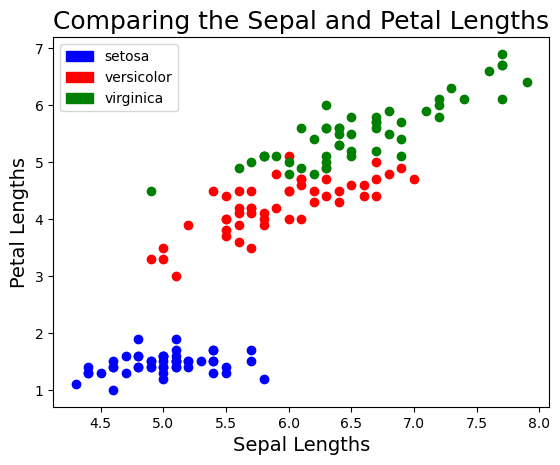

In [437]:
# Plot the information

def plot_lengths():
    plt.scatter(plant1.sepal_lengths, y=plant1.petal_lengths, color=plant1.color)
    plt.scatter(plant2.sepal_lengths, y=plant2.petal_lengths, color=plant2.color)
    plt.scatter(plant3.sepal_lengths, y=plant3.petal_lengths, color=plant3.color)

    plt.title("Comparing the Sepal and Petal Lengths", fontsize = 18)
    plt.xlabel("Sepal Lengths", fontsize = 14)
    plt.ylabel("Petal Lengths", fontsize = 14)

    plt.legend(handles=legend)

    
def plot_widths():
    plt.scatter(plant1.sepal_widths, y=plant1.petal_widths, color=plant1.color)
    plt.scatter(plant2.sepal_widths, y=plant2.petal_widths, color=plant2.color)
    plt.scatter(plant3.sepal_widths, y=plant3.petal_widths, color=plant3.color)

    plt.title("Comparing the Sepal and Petal widths", fontsize = 18)
    plt.xlabel("Sepal Widths", fontsize = 14)
    plt.ylabel("Petal Widths", fontsize = 14)
    
    plt.legend(handles=legend)
    
def plot_sepal_legnth_petal_width():
    
    plt.scatter(plant1.sepal_lengths, y=plant1.petal_widths, color=plant1.color)
    plt.scatter(plant2.sepal_lengths, y=plant2.petal_widths, color=plant2.color)
    plt.scatter(plant3.sepal_lengths, y=plant3.petal_widths, color=plant3.color)

    plt.title("Comparing the Sepal length and Petal widths", fontsize = 18)
    plt.xlabel("Sepal length", fontsize = 14)
    plt.ylabel("Petal widths", fontsize = 14)
    
    plt.legend(handles=legend)
    
def plot_sepal_width_petal_length():
    plt.scatter(plant1.sepal_widths, y=plant1.petal_lengths, color=plant1.color)
    plt.scatter(plant2.sepal_widths, y=plant2.petal_lengths, color=plant2.color)
    plt.scatter(plant3.sepal_widths, y=plant3.petal_lengths, color=plant3.color)

    plt.title("Comparing the Sepal Widths and Petal Lengths", fontsize = 18)
    plt.xlabel("Sepal Widths", fontsize = 14)
    plt.ylabel("Petal lengths", fontsize = 14)
    
    plt.legend(handles=legend)

plot_lengths()   

In [438]:
#  Verify the data since we have only 35 pnts showing and 50 were given

# For plant one we will show that the there are a number of duplicates by comparing the size of a list to the 
# size of the set.

non_duplicates = set()
for index in range(0,len(plant1.petal_lengths)):
    my_tuple = (plant1.sepal_lengths[index], plant1.petal_lengths[index])
    non_duplicates.add(my_tuple)
    
print("The length of the list is " + str(len(plant1.petal_lengths)))
print("The length of the set  is " + str(len(non_duplicates)))

if ( len(plant1.petal_lengths) > len(non_duplicates) ):
    print("Hypthosis Confirmed: The reason for less points dispalying than expected is the list has duplicates")
else:
    print("Hypothosis Failed: The number in the list is the same as in the set")

The length of the list is 50
The length of the set  is 35
Hypthosis Confirmed: The reason for less points dispalying than expected is the list has duplicates


## Problem 3

> * Build a machine learning process that :
>> * Loads the iris dataset or a data set of your choosing\
>> * Scales / normalizes the traing data
>> * Reduces dimensionality using PCA
>> * Splits processed data into K-Folds
> Determine how many neighbours and folds are required for highest accuracy

Assumption : We already have the Iris Data Loaded in.

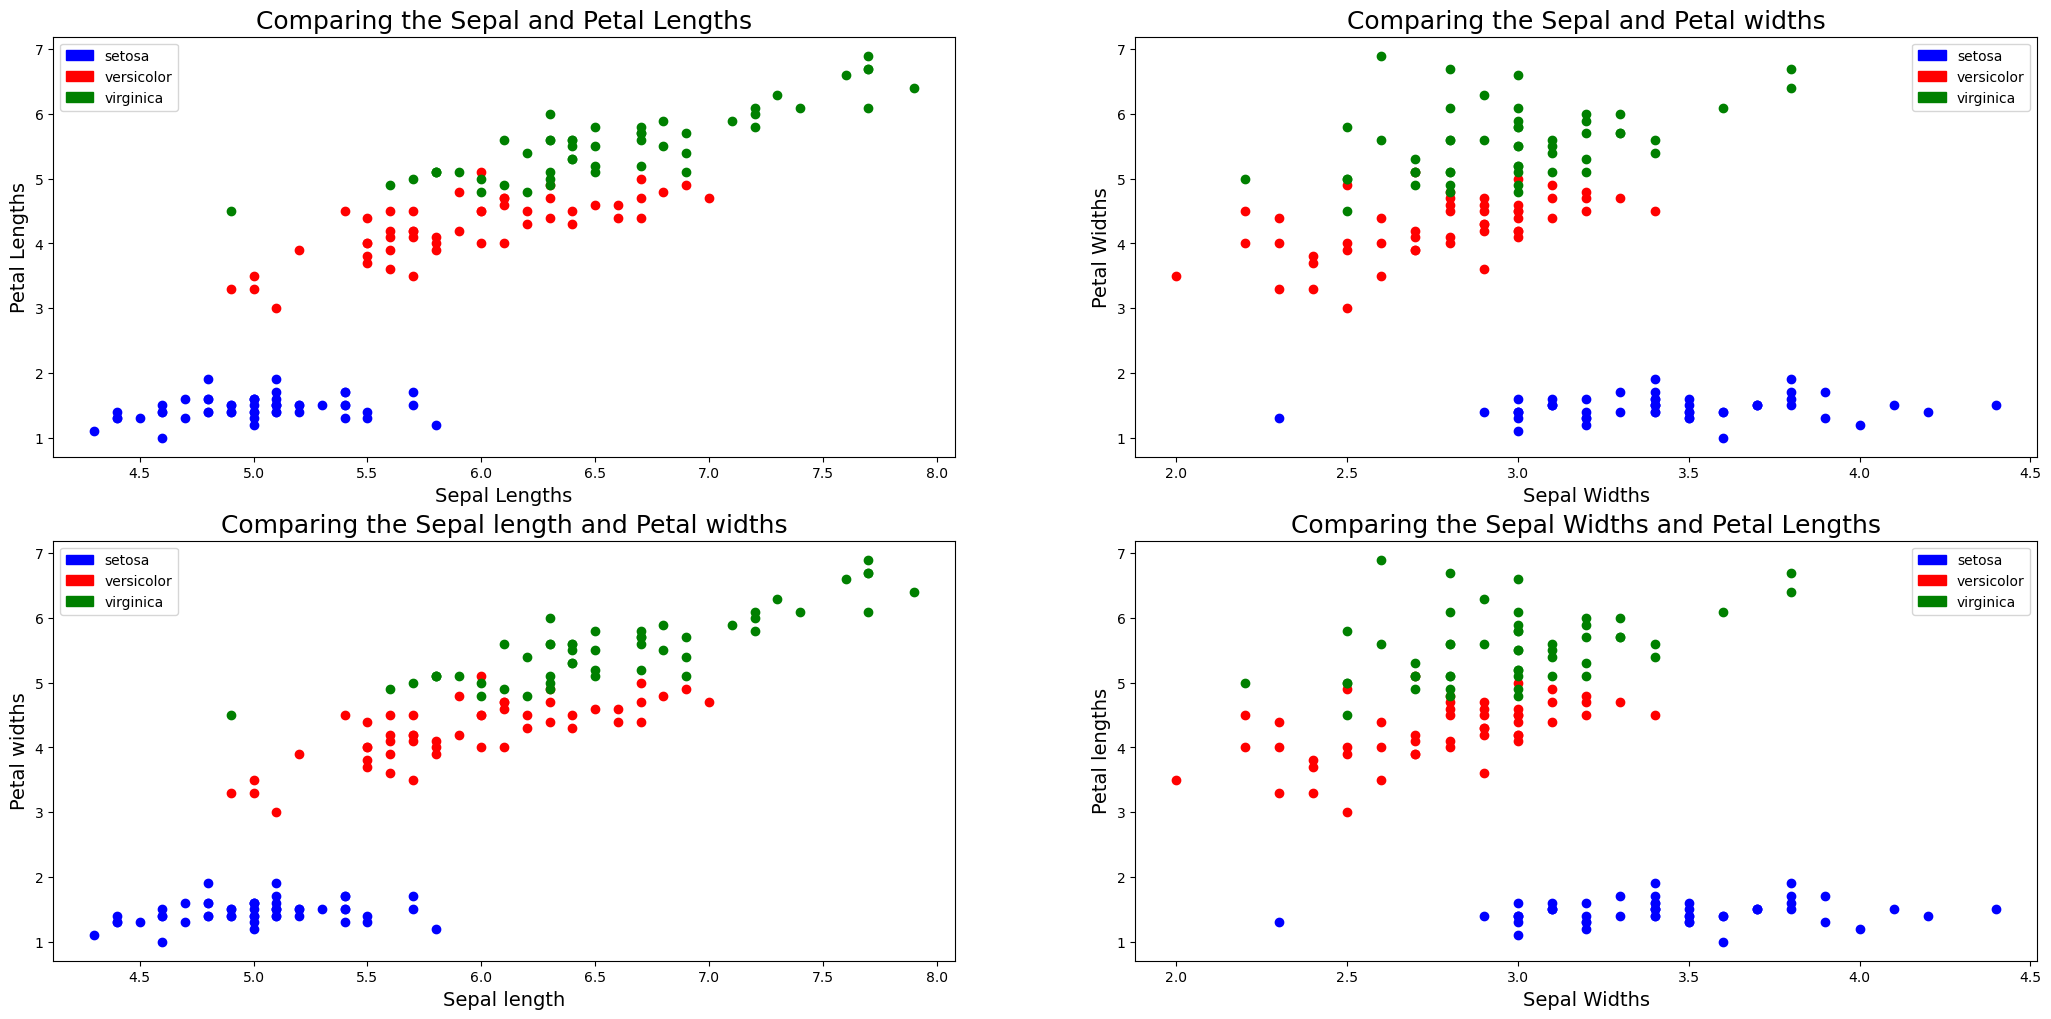

In [440]:
figure, axis = plt.subplots(2,2, figsize=(25.6, 12.0))

# Set the current Axes to *ax* and the current Figure to the parent of *ax*.
# Todo -- Work with a for loop --
# This is Correlation.
plt.sca(axis[0,0])
plot_lengths()

plt.sca(axis[0,1])
plot_widths()

plt.sca(axis[1,0])

plot_sepal_legnth_petal_width()

plt.sca(axis[1,1])
plot_sepal_width_petal_length()


In [441]:
def convertToDataFrame(features, column_lables):
    '''
        Convet numpy Arrays into a dataframe 
        Asumpiton: The order of the rows has been preserver from the original iris data set
    '''
    new_data_frame = pd.DataFrame(data=features, columns=column_lables)
    return new_data_frame

In [457]:
# Since this is most like a supervised model create the X and y datasets
def createTestAndTrainSet(irisDataframe):
    X = irisDataframe.drop("specieis", axis=1)
    y = irisDataframe[["specieis"]]
    return X,y

X,y = createTestAndTrainSet(iris_data_frame)
y

,specieis
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


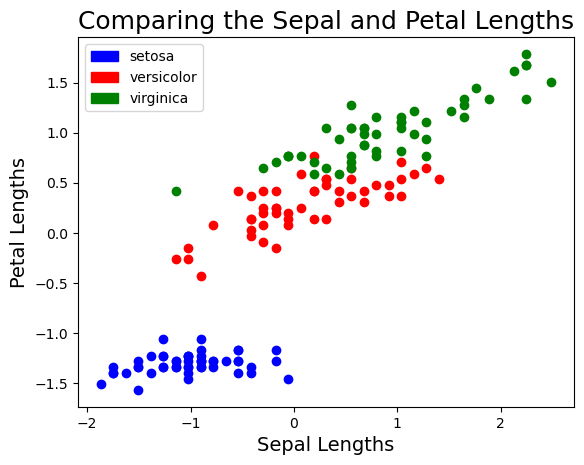

In [458]:
from sklearn.preprocessing import StandardScaler

# Standarize the data to the normal distirbution so that it can be compared to other points
data_as_standardize = StandardScaler().fit_transform(X)

# Create the object that will be used to plot the data
plant1 = Point(dataFrame_as_standardize, iris_dataset, "setosa", "blue")
plant2 = Point(dataFrame_as_standardize, iris_dataset, "versicolor", "red")
plant3 = Point(dataFrame_as_standardize, iris_dataset, "virginica", "green")

plot_lengths()



pandas.core.frame.DataFrame

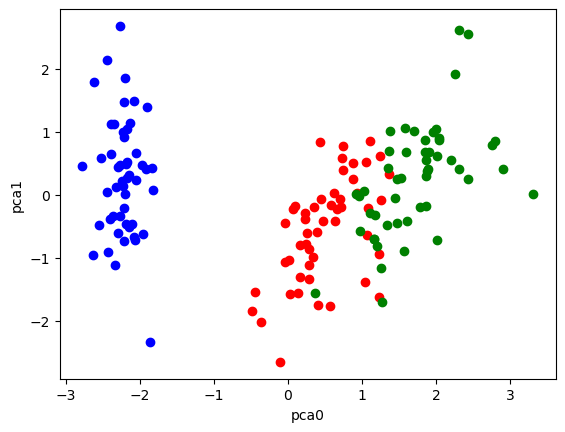

In [459]:
# Perform a Principal Components Analysis
# How do you good value for n_compoents -- what should I look for in the graph
# What can I learn from the graph
from sklearn.decomposition import PCA

principal_component_analysis = PCA(n_components=2)
data_with_pca_done = principal_component_analysis.fit_transform(data_as_standardize)
column_names = principal_component_analysis.get_feature_names_out()

my_colors = { 0:'blue', 1:'red', 2:'green'}

for x in range(0,len(data_with_pca_done)):
 plt.scatter(
        x=data_with_pca_done[x][0], 
        y=data_with_pca_done[x][1], 
        c=my_colors.get(iris_dataset.target[x], "black"))
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])

iris_dataframe_preprocessed = convertToDataFrame(data_with_pca_done, ['pca1', 'pca2'])

In [460]:
# Split the Data into K Folds
# K-folds -- Split the dataset info k consecutive folds
# where the first k - 1 is used for validation and the last is used for test
# Probolem : When parameters for KFold is random_state=None, Shuffle=False then get the same data back
from sklearn.model_selection import KFold
from string import Template

template = Template("Fold $index \n\tTrain: index=$train_index\n\tTest: index=$test_index\n")

k_folds = KFold(n_splits=5, random_state=None, shuffle=False)
for i, ( train_index, test_index ) in enumerate(k_folds.split(X)):
    output = template.substitute(index=i, train_index=train_index, test_index=test_index)
    print(output)


Fold 0 
	Train: index=[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
	Test: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

Fold 1 
	Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 

In [479]:
from sklearn.neighbors import KNeighborsRegressor

final_dataframe = pd.DataFrame(columns=['Fold', 'Neighbors', 'Socre'])

run = 1
for train_index, test_index in k_folds.split(X):
    X_train = iris_dataframe_preprocessed.iloc[train_index, :]
    y_train = y.iloc[train_index, :]

    x_test = iris_dataframe_preprocessed.iloc[test_index, :]
    y_test = y.iloc[test_index, :]
    
    for K in range(1,11):
            # The target is predicted by local interpreation of the targes associated of the nearest neighbors
            # in the training set
            k_nearest_neighbor = KNeighborsRegressor(n_neighbors= K)
            k_nearest_neighbor.fit(X_train, y_train)
            score = k_nearest_neighbor.score(x_test, y_test)
            
            final_dataframe.loc[len(final_dataframe)] = [ run, K, score]
            
final_dataframe
            

,Fold,Neighbors,Socre
0,1.0,1.0,1.000000
1,1.0,2.0,1.000000
2,1.0,3.0,1.000000
3,1.0,4.0,1.000000
4,1.0,5.0,1.000000
5,1.0,6.0,1.000000
6,1.0,7.0,1.000000
7,1.0,8.0,1.000000
8,1.0,9.0,1.000000
9,1.0,10.0,1.000000
